In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
from subprocess import check_output

In [2]:
auto_data = pd.read_csv("Automobiledata_cleaned.csv")

In [3]:
auto_data = pd.DataFrame(auto_data)

In [4]:
auto_data.shape

(183, 33)

In [5]:
auto_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'num_cylinders', 'num_doors', 'Area',
       'engine_size_cc', 'hp2cw_ratio', 'risk_analysis', 'risky'],
      dtype='object')

# 1. Univariate Analysis
Phase - 2: Analysis on the Key features of the Automobile set

#### 1.1 Vehicle make frequency diagram

Text(0.5, 0, 'Make')

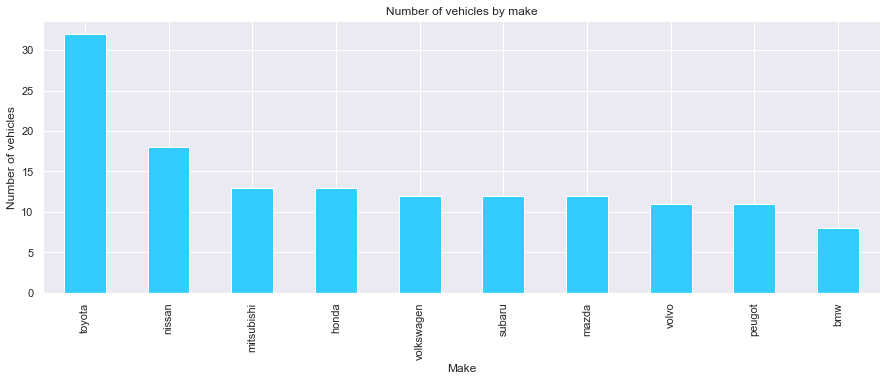

In [6]:
auto_data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5), color = '#33ccff')
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

#### 1.2 Insurance risk ratings

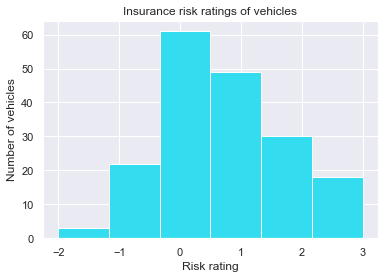

In [7]:
auto_data.symboling.hist(bins=6,color='#33ddef')
plt.title('Insurance risk ratings of vehicles')
plt.ylabel("Number of vehicles")
plt.xlabel("Risk rating");

#### 1.3 Normalized Losses

Text(0.5, 0, 'Normalized losses')

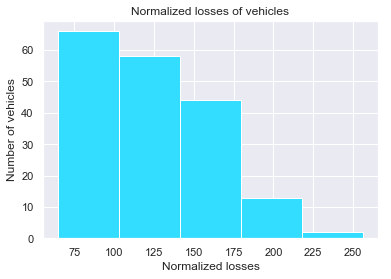

In [8]:
auto_data['normalized-losses'].hist(bins=5,color='#33ddff');
plt.title("Normalized losses of vehicles")
plt.ylabel("Number of vehicles")
plt.xlabel("Normalized losses")

#### 1.4 Fuel-type

Text(0.5, 0, 'Fuel type')

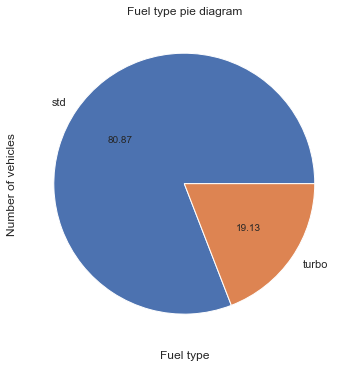

In [9]:
auto_data['aspiration'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel("Number of vehicles")
plt.xlabel("Fuel type")

#### 1.5 Horsepower

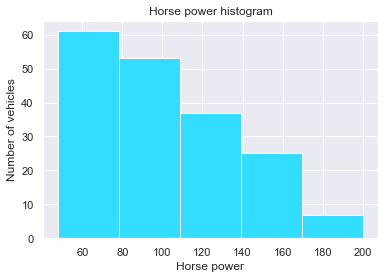

In [10]:
auto_data.horsepower[np.abs(auto_data.horsepower-auto_data.horsepower.mean())<=(3*auto_data.horsepower.std())].hist(bins=5,color='#33ddff');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

#### 1.6 Curb weight 

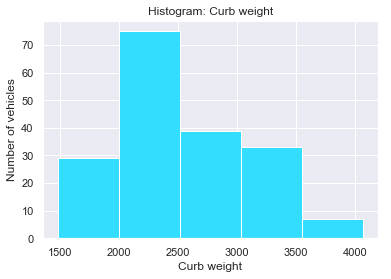

In [11]:
auto_data['curb-weight'].hist(bins=5,color='#33ddff');
plt.title("Histogram: Curb weight")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

#### 1.7 Drive wheels

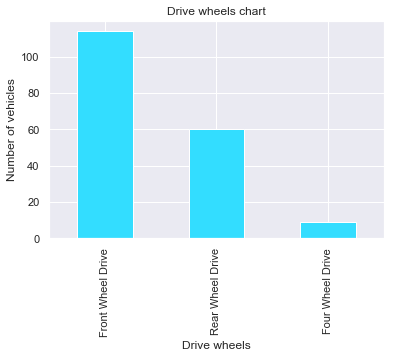

In [12]:
auto_data['drive-wheels'].value_counts().plot(kind='bar',color='#33ddff')
plt.title("Drive wheels chart")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

#### 1.8 Number of Doors

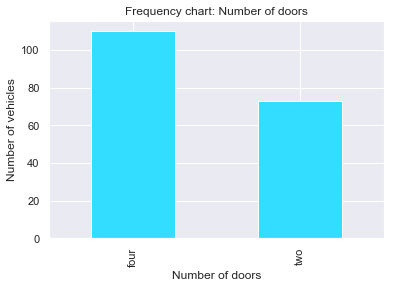

In [13]:
auto_data['num-of-doors'].value_counts().plot(kind='bar',color='#33ddff')
plt.title("Frequency chart: Number of doors")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

#### 1.9 Groupby Drive wheels and num of doors with respect to price

grouping by drive-wheels and number of doors, and aggregating price
drive-wheels       num_doors
Four Wheel Drive   2             25462.166667
                   4             74325.000000
Front Wheel Drive  2            405543.000000
                   4            646798.000000
Rear Wheel Drive   2            413608.000000
                   4            760168.000000
Name: price, dtype: float64


Text(0, 0.5, 'price')

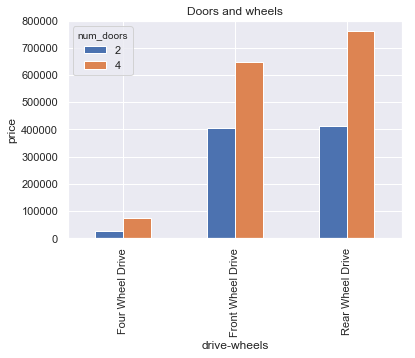

In [16]:
groupbywheelsdoors = auto_data.groupby(['drive-wheels', 'num_doors'])
print("grouping by drive-wheels and number of doors, and aggregating price")
print(groupbywheelsdoors['price'].aggregate(np.sum))
#Without the hierarchical indexing
wheelsdoorspricesum = groupbywheelsdoors['price'].aggregate(np.sum).unstack()

wheelsdoorspricesum.plot(kind = 'bar', title = 'Doors and wheels')
plt.ylabel('price')

#### 1.10 Validating the distribution of Engine parameters

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


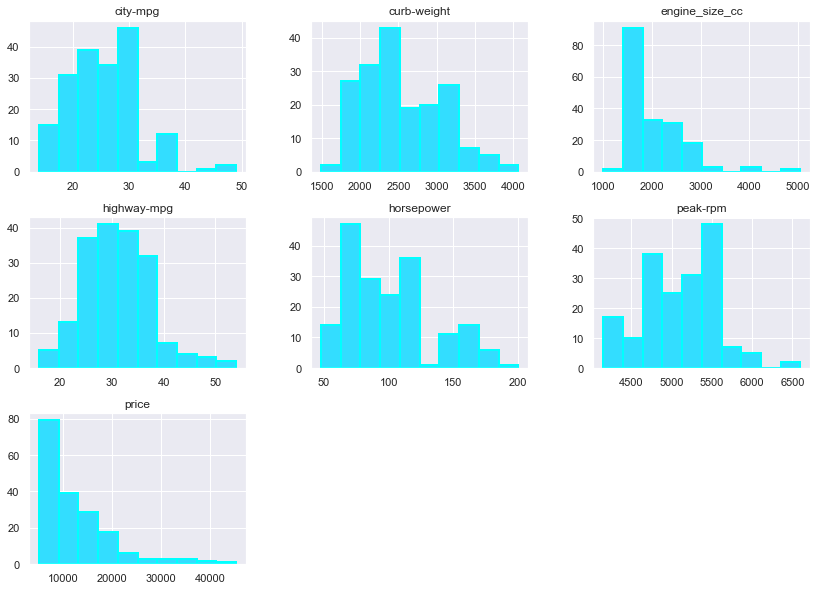

In [24]:
title_color = "navy"
plot_color = "cyan"
plot_alt_color = "coral"
plot_color_secondary = "deepskyblue"
y_title_margin = 1.0

fig, ax = plt.subplots(figsize=(14,10), ncols=1, nrows=1)
fig.patch.set_alpha(.7)

auto_data[['engine_size_cc','peak-rpm','curb-weight','horsepower', 'city-mpg', 'highway-mpg','price']].hist(color='#33ddff', ax=ax, edgecolor=plot_color, linewidth=2)
plt.show()

### 2 Observations from the univariate analysis 

after refering to the above charts of the key features, below mentioned is the analysis

1. Most number of vehicles in the market are of Toyota make and is more than 40%. The next highest is Nissan.

2. Customers are preferring standard fuel type rather to turbo. The choice is more than 80%.

3. Most number of cars are having "front wheel drive" followed by "Rear wheel drive". "Four wheel drive" is very less.

4. Majority of the cars, curb weight is distributed between 1500 and 4000.

5. Automobile Dataset has the symboling or insurance risk rating starting from -2, instead theoritically it was the range between -3 to +3. Most of the cars insurance risk rating is falling in the range of 0 and 1.

6. Average loss payment for the insured vehicle year has most of the cars in the range between 65 to 150.

7. Pricing of four door cars is more comparitively to the two door cars which are more in rear wheel drive followed by front wheel drive 

## 3 Correlation Analysis

Observations: There are some good inferences we can take it from the correlation heat map.

1. Price is more correlated to engine-size and curb-weight of the respective car. i.e., 0.88 and 0.86 respectively.
2. Curb-weight of the car is mostly correlated with engine-size, length/width of the car and wheel-base i.e., 0.86, 0.89, 0.88 and 0.83 respectively.
3. Wheel-base of the car is highly correlated with the length and width of the car 0.89 and 0.83 respectivley.
4. Symboling and normalized losses are correlated than the other fields.

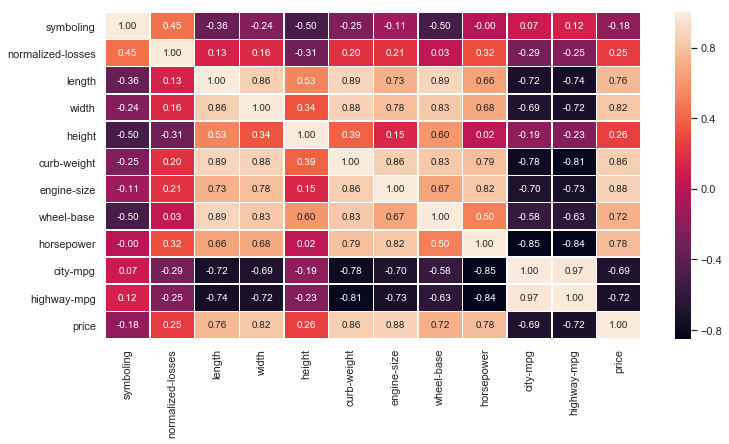

In [22]:
import seaborn as sns

plt.figure(figsize=(12,6))
autoDataColumns = ['symboling','normalized-losses','length','width','height','curb-weight','engine-size','wheel-base','body-style','drive-wheels','horsepower','city-mpg','highway-mpg','price']
sns.heatmap(auto_data[autoDataColumns].corr(), annot=True, fmt='.2f', linewidths=.5)

plt.savefig('Automobile_dataset_correlation.png', bbox_inches='tight')